### <center>Vidzeme University of Applied Science</center>
# <center>Practical Work 5 & 6 <br/> Analysis of IMDB top 1000 Movies</center>
### <center>Group ??</center>

### Aim of Practical Work

In this practical, our goal is to analyze the IMDb Top 1000 movies dataset to predict and understand which movie attributes have the most influence on IMDB rating and box office gross. Using pandas and matplotlib libraries, we will clean and explore the data, looking at variables such as genre, runtime, director, year of release, and more.

### Dataset

We are using this [dataset](https://www.kaggle.com/datasets/harshitshankhdhar/imdb-dataset-of-top-1000-movies-and-tv-shows) from kaggle.com that includes the following:

- Poster_Link - Link of the poster that imdb using
- Series_Title = Name of the movie
- Released_Year - Year at which that movie released
- Certificate - Certificate earned by that movie
- Runtime - Total runtime of the movie
- Genre - Genre of the movie
- IMDB_Rating - Rating of the movie at IMDB site
- Overview - mini story/ summary
- Meta_score - Score earned by the movie
- Director - Name of the Director
- Star1,Star2,Star3,Star4 - Name of the Stars
- No_of_votes - Total number of votes
- Gross - Money earned by that movie





In [152]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [153]:
path = "./imdb_top_1000.csv"
df = pd.read_csv(path)
df.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


### Data cleaning

Printing out the dataframe info we see that we have some **null values**. We don't particulary care about the certifacte and Meta score colums (we will use IMDB rating), but we **we do** care about the gross column where we have 169 null values.

In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   object 
 3   Certificate    899 non-null    object 
 4   Runtime        1000 non-null   object 
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     843 non-null    float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          831 non-null    object 
dtypes: float64(2), int64(1), object(13)
memory usage: 125.1+ KB


Upon further investigation, we found that the missing movie revenue data is primarily due to three reasons:

- Older films with incomplete records
- Digital-only releases that lack box office data
- Foreign films with unreported or inaccessible revenue information

Although removing these rows may introduce some bias into the analysis, we will proceed with their removal to simplify the analysis process.

In [155]:
df[df['Gross'].isnull()]

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
18,https://m.media-amazon.com/images/M/MV5BNjViNW...,Hamilton,2020,PG-13,160 min,"Biography, Drama, History",8.6,The real life of one of America's foremost fou...,90.0,Thomas Kail,Lin-Manuel Miranda,Phillipa Soo,Leslie Odom Jr.,Renée Elise Goldsberry,55291,NaN
20,https://m.media-amazon.com/images/M/MV5BOTc2ZT...,Soorarai Pottru,2020,U,153 min,Drama,8.6,"Nedumaaran Rajangam ""Maara"" sets out to make t...",NaN,Sudha Kongara,Suriya,Madhavan,Paresh Rawal,Aparna Balamurali,54995,NaN
30,https://m.media-amazon.com/images/M/MV5BYjBmYT...,Seppuku,1962,NaN,133 min,"Action, Drama, Mystery",8.6,When a ronin requesting seppuku at a feudal lo...,85.0,Masaki Kobayashi,Tatsuya Nakadai,Akira Ishihama,Shima Iwashita,Tetsurô Tanba,42004,NaN
32,https://m.media-amazon.com/images/M/MV5BZjc4ND...,It's a Wonderful Life,1946,PG,130 min,"Drama, Family, Fantasy",8.6,An angel is sent from Heaven to help a despera...,89.0,Frank Capra,James Stewart,Donna Reed,Lionel Barrymore,Thomas Mitchell,405801,NaN
46,https://m.media-amazon.com/images/M/MV5BZmY2Nj...,Hotaru no haka,1988,U,89 min,"Animation, Drama, War",8.5,A young boy and his little sister struggle to ...,94.0,Isao Takahata,Tsutomu Tatsumi,Ayano Shiraishi,Akemi Yamaguchi,Yoshiko Shinohara,235231,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
993,https://m.media-amazon.com/images/M/MV5BYTE4YW...,Blowup,1966,A,111 min,"Drama, Mystery, Thriller",7.6,A fashion photographer unknowingly captures a ...,82.0,Michelangelo Antonioni,David Hemmings,Vanessa Redgrave,Sarah Miles,John Castle,56513,NaN
995,https://m.media-amazon.com/images/M/MV5BNGEwMT...,Breakfast at Tiffany's,1961,A,115 min,"Comedy, Drama, Romance",7.6,A young New York socialite becomes interested ...,76.0,Blake Edwards,Audrey Hepburn,George Peppard,Patricia Neal,Buddy Ebsen,166544,NaN
996,https://m.media-amazon.com/images/M/MV5BODk3Yj...,Giant,1956,G,201 min,"Drama, Western",7.6,Sprawling epic covering the life of a Texas ca...,84.0,George Stevens,Elizabeth Taylor,Rock Hudson,James Dean,Carroll Baker,34075,NaN
998,https://m.media-amazon.com/images/M/MV5BZTBmMj...,Lifeboat,1944,NaN,97 min,"Drama, War",7.6,Several survivors of a torpedoed merchant ship...,78.0,Alfred Hitchcock,Tallulah Bankhead,John Hodiak,Walter Slezak,William Bendix,26471,NaN


In [156]:
# Drops rows with missing Gross data
df = df.dropna(subset=['Gross'])

### Next, let's clean up the datatypes

In [157]:
df.dtypes

Poster_Link       object
Series_Title      object
Released_Year     object
Certificate       object
Runtime           object
Genre             object
IMDB_Rating      float64
Overview          object
Meta_score       float64
Director          object
Star1             object
Star2             object
Star3             object
Star4             object
No_of_Votes        int64
Gross             object
dtype: object

In [158]:
df['Gross'] = df['Gross'].str.replace(',', '')
df['Gross'] = pd.to_numeric(df['Gross'])

df['Runtime'] = df['Runtime'].str.replace('min', '')
df['Runtime'] = pd.to_numeric(df['Runtime'])

In [159]:
# The movie Appolo 13 was released in the year PG???
print(df[df['Released_Year'].str.contains(r'\D')])

df = df[df['Series_Title'] != 'Apollo 13']
df['Released_Year'] = pd.to_numeric(df['Released_Year'])

                                           Poster_Link Series_Title  \
966  https://m.media-amazon.com/images/M/MV5BNjEzYj...    Apollo 13   

    Released_Year Certificate  Runtime                      Genre  \
966            PG           U      140  Adventure, Drama, History   

     IMDB_Rating                                           Overview  \
966          7.6  NASA must devise a strategy to return Apollo 1...   

     Meta_score    Director      Star1        Star2        Star3        Star4  \
966        77.0  Ron Howard  Tom Hanks  Bill Paxton  Kevin Bacon  Gary Sinise   

     No_of_Votes      Gross  
966       269197  173837933  


In [160]:
df.dtypes

Poster_Link       object
Series_Title      object
Released_Year      int64
Certificate       object
Runtime            int64
Genre             object
IMDB_Rating      float64
Overview          object
Meta_score       float64
Director          object
Star1             object
Star2             object
Star3             object
Star4             object
No_of_Votes        int64
Gross              int64
dtype: object

### Now let's see if there is a correlation between the gross attribute and IMDB rating attribute.

In [167]:
ratings = df['IMDB_Rating'].to_numpy()
gross = df['Gross'].to_numpy()

In [168]:
print("Mean IMDb Rating:", round(np.mean(ratings), 2))
print("Standard Deviation of IMDb Rating:", round(np.std(ratings), 2))

print("Mean Gross: ${:,.2f}".format(np.mean(gross)))
print("Standard Deviation of Gross: ${:,.2f}".format(np.std(gross)))

Mean IMDb Rating: 7.95
Standard Deviation of IMDb Rating: 0.28
Mean Gross: $67,907,277.16
Standard Deviation of Gross: $109,688,507.18


Correlation between IMDb Rating and Gross: 0.09749023189963019


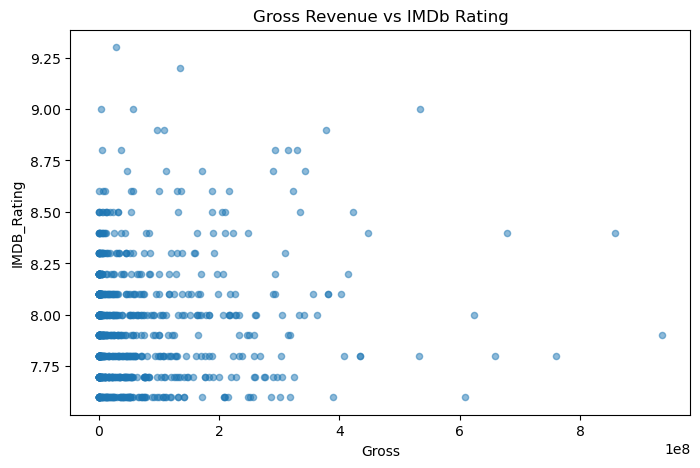

In [169]:
correlation = np.corrcoef(ratings, gross)[0, 1]
print("Correlation between IMDb Rating and Gross:", correlation)

df['Gross'] = df['Gross'].replace(r'[\$,]', '', regex=True).astype(float)

df.plot(kind='scatter', x='Gross', y='IMDB_Rating', alpha=0.5, figsize=(8,5),
        title='Gross Revenue vs IMDb Rating');


##### Given that the correlation is almost 0 this means that there is almost none correlation between IMDB rating and GROSS income

Correlation between Runtime and IMDb Rating: 0.2478864612879629


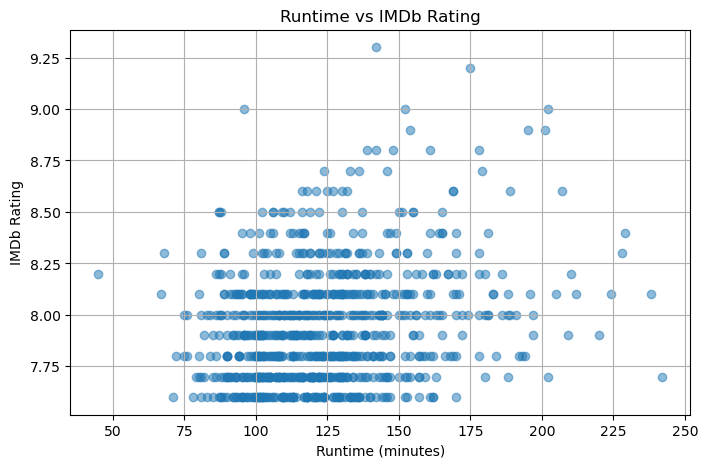

In [170]:
runtime = df['Runtime'].to_numpy()

correlation = np.corrcoef(runtime, ratings)[0, 1]
print("Correlation between Runtime and IMDb Rating:", correlation)

plt.figure(figsize=(8, 5))
plt.scatter(df['Runtime'], df['IMDB_Rating'], alpha=0.5)
plt.xlabel('Runtime (minutes)')
plt.ylabel('IMDb Rating')
plt.title('Runtime vs IMDb Rating')
plt.grid(True)
plt.show()

##### 0.25 suggests that there is a weak positive correlation meaning that as the runtime increases the IMDB scores also does.

War          0.054637
Western      0.044669
Sci-Fi       0.044249
Drama        0.040503
Adventure    0.031701
Mystery      0.025733
Film-Noir    0.025289
Crime        0.022143
Action      -0.000943
Sport       -0.011378
History     -0.011436
Musical     -0.015306
Romance     -0.023716
Animation   -0.026142
Music       -0.027514
Biography   -0.028566
Thriller    -0.036525
Fantasy     -0.039920
Horror      -0.040867
Family      -0.050581
Comedy      -0.097560
dtype: float64


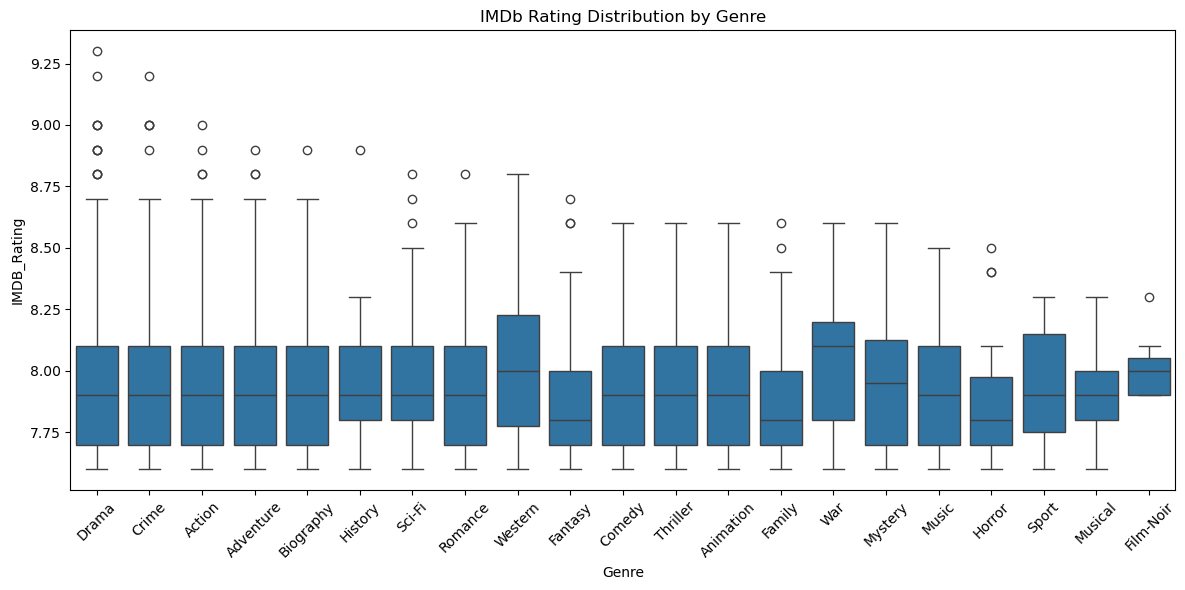

In [171]:
genre_dummies = df['Genre'].str.get_dummies(sep=', ')  # split genre column

genre_correlations = genre_dummies.apply(lambda col: np.corrcoef(col.to_numpy(), ratings)[0, 1])

print(genre_correlations.sort_values(ascending=False))

df_expanded = df.assign(Genre=df['Genre'].str.split(', ')).explode('Genre')

plt.figure(figsize=(12,6))
sns.boxplot(data=df_expanded, x='Genre', y='IMDB_Rating')
plt.xticks(rotation=45)
plt.title('IMDb Rating Distribution by Genre')
plt.tight_layout()
plt.show()


##### Based on the correlation data, genre does not affect the IMDB rating

c:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


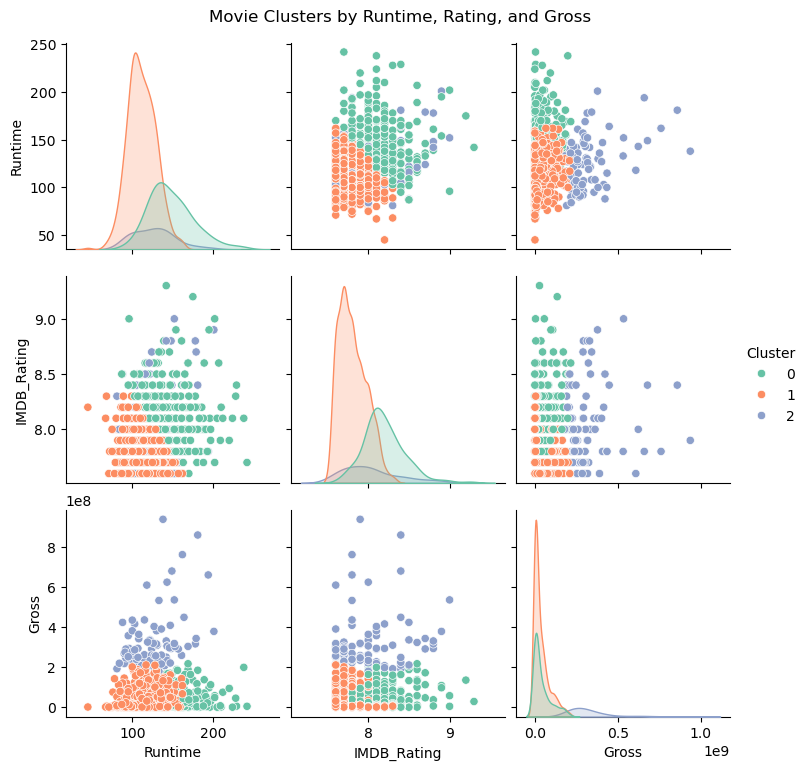

In [172]:

features = df[['Runtime', 'IMDB_Rating', 'Gross']].copy()
# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(scaled_features)

# Add cluster labels to the features DataFrame
features['Cluster'] = clusters

# Visualize the clusters
sns.pairplot(features, hue='Cluster', palette='Set2')
plt.suptitle("Movie Clusters by Runtime, Rating, and Gross", y=1.02)
plt.show()


##### The orange cluster represents shorter and lower grossing films, the green cluster represents the moderate runtime and revenue films but the purple cluster represents the high grossing films. As you can see IMDB ratings are fairly consistent across all clusters.